In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('playstore-data.csv.gz',compression='gzip')

In [3]:
data.head()

,Unnamed: 0,Category,Free,Price,Size,Min_Version,DeveloperId,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Rating,Rating_Count,Rating_Sum,Min_Downloads,Max_Downloads
0,0,Adventure,True,0.0,10.0,7.1,Jean Confident Irénée NIYIZIBYOSE,18,18,Everyone,False,False,0.0,0,0.0,10,15
1,1,Tools,True,0.0,2.9,5.0,Webserveis,15,4,Everyone,True,False,4.4,64,281.6,5000,7662
2,2,Productivity,True,0.0,3.7,4.0,Cabin Crew,25,24,Everyone,False,False,0.0,0,0.0,50,58
3,3,Communication,True,0.0,1.8,4.0,Climate Smart Tech2,36,34,Everyone,True,False,5.0,5,25.0,10,19
4,4,Tools,True,0.0,6.2,4.1,Rafal Milek-Horodyski,18,34,Everyone,False,False,0.0,0,0.0,100,478


In [4]:
data.drop(['Unnamed: 0'],1,inplace=True)

In [5]:
data.dtypes

Category            object
Free                  bool
Price              float64
Size               float64
Min_Version        float64
DeveloperId         object
Released_Before      int64
Updated_Before       int64
Content             object
Ad_Support            bool
Inapp_Purchase        bool
Rating             float64
Rating_Count         int64
Rating_Sum         float64
Min_Downloads        int64
Max_Downloads        int64
dtype: object

Checking that the Rating column has zeros where only Rating_sum is zero

In [6]:
print(data[data['Rating'] == 0.0].shape)
df = data[data['Rating'] == 0.0]
df[df['Rating_Count'] == 0].shape

(1005064, 16)


(1005064, 16)

Noticing that there is no difference in them, we can drop the rows which has *zeros* in ```Rating```, so that every rows which has *zeros* in ```Rating``` and ```Rating_Sum```

In [7]:
print(data.shape)
data.drop(data[data['Rating'] == 0.0].index,inplace=True)
data.shape

(2145742, 16)


(1140678, 16)

#### Making a meaningful **feature** from ```Min_Downloads``` and ```Max_Downloads``` to make it continuous

In [8]:
data[data["Max_Downloads"] == 0].shape

(137, 16)

Checking for zeros in ```Max_downloads``` 

In [9]:
print(data.shape)
data.drop(data[data["Max_Downloads"] == 0].index,inplace=True)
data.shape

(1140678, 16)


(1140541, 16)

we drop them because it may cause *Non-definite* values when divide ```0``` with ```2```

In [10]:
data['Average_Downloads'] = data['Min_Downloads'] +((data['Max_Downloads'] - data['Min_Downloads'])/2)
data.drop(['Rating','Rating_Count','Min_Downloads','Max_Downloads','DeveloperId'],1,inplace=True)

In [11]:
data.reset_index(drop=True)

,Category,Free,Price,Size,Min_Version,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Rating_Sum,Average_Downloads
0,Tools,True,0.0,2.9,5.0,15,4,Everyone,True,False,281.6,6331.0
1,Communication,True,0.0,1.8,4.0,36,34,Everyone,True,False,25.0,14.5
2,Libraries & Demo,True,0.0,2.5,4.1,23,23,Everyone,True,False,54.0,1783.5
3,Lifestyle,True,0.0,16.0,5.0,26,26,Everyone,False,False,78.0,601.0
4,Personalization,True,0.0,3.5,4.1,23,11,Everyone,True,False,3854.0,56216.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1140536,Action,True,0.0,37.0,4.0,70,54,Teen,True,True,444903.8,6137330.0
1140537,Music & Audio,True,0.0,4.1,2.2,81,81,Everyone,False,False,1376.0,657274.0
1140538,Education,True,0.0,10.0,4.1,39,32,Everyone,True,False,57.8,1490.0
1140539,Music & Audio,True,0.0,10.0,5.0,61,4,Everyone,True,False,28.0,1817.5


#### making the newly created columns to **```integer```**

In [12]:
data["Rating_Sum"] = data['Rating_Sum'].apply(np.int64)

In [13]:
data["Average_Downloads"] = data['Average_Downloads'].apply(np.int64)
data.head()

,Category,Free,Price,Size,Min_Version,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Rating_Sum,Average_Downloads
1,Tools,True,0.0,2.9,5.0,15,4,Everyone,True,False,281,6331
3,Communication,True,0.0,1.8,4.0,36,34,Everyone,True,False,25,14
6,Libraries & Demo,True,0.0,2.5,4.1,23,23,Everyone,True,False,54,1783
7,Lifestyle,True,0.0,16.0,5.0,26,26,Everyone,False,False,78,601
8,Personalization,True,0.0,3.5,4.1,23,11,Everyone,True,False,3854,56216


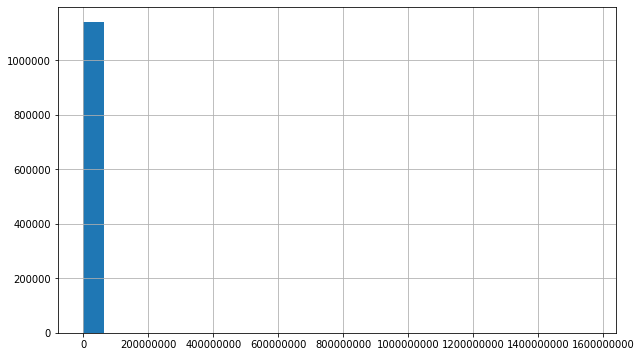

In [14]:
plt.figure(figsize=(10,6))
data['Average_Downloads'].hist(bins = 25)
plt.ticklabel_format(useOffset=False,style='Plain')
plt.show()

The newly created column here shows that, there may be more **Outliers** and the ```min max``` values might be **too far away**

### Splitting numerical and categorical values

In [15]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O' and data[feature].dtypes != 'bool']
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print(numerical_features,categorical_features)

['Price', 'Size', 'Min_Version', 'Released_Before', 'Updated_Before', 'Rating_Sum', 'Average_Downloads'] ['Category', 'Content']


### Splitting Continuous and Discreate values from numerical values

In [16]:
discreate_feature = ['Min_Version']
continuous_feature = [features for features in numerical_features if features not in discreate_feature]
print(continuous_feature,discreate_feature)

['Price', 'Size', 'Released_Before', 'Updated_Before', 'Rating_Sum', 'Average_Downloads'] ['Min_Version']


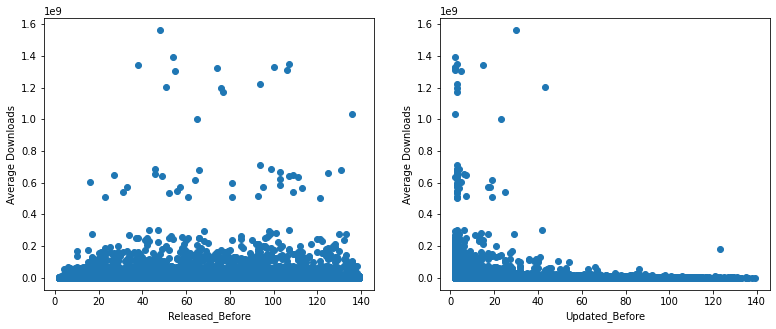

In [17]:
fig = plt.figure(figsize=(13,5))

for feature,i in zip(['Released_Before','Updated_Before'], range(1,3)):
    ax = fig.add_subplot(1,2,i)
    dataset = data.copy()
    ax.scatter(data[feature],data['Average_Downloads'])
    ax.set_xlabel(feature)
    ax.set_ylabel("Average Downloads")

plt.show()

As you can see in the both the plots, Data are acumulated towards the zeros of Average Downloads. 
- This is because, 
    - There may be more outliers 
    - They are to be scaled in some manner so that they give normal distribution

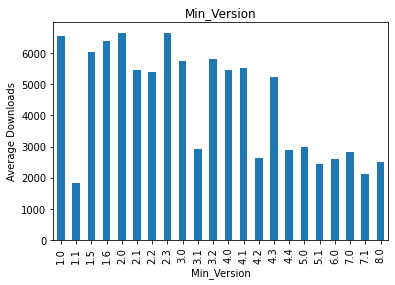

In [18]:
for feature in discreate_feature:
    dataset = data.copy()
    dataset.groupby(feature)['Average_Downloads'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Average Downloads')
    plt.title(feature)
    plt.show()

This graph doesn't give clean results, but if we see carefully the Average Downloads tends to decrease when the minimum version of a mobile app increases.
- Means, the app which are launch from most basic version tend to have more downloads 
- which means, most people still use outdated phones (which has lower android versions), so that they will be able to use the app published

In [19]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Category and number of categories are 48
The feature is Content and number of categories are 6


There are two major categorical columns
- the column with 6 unique values can be manipulated easily through **One Hot Encoding**
- the column with 48 unique values are to be managed in different way

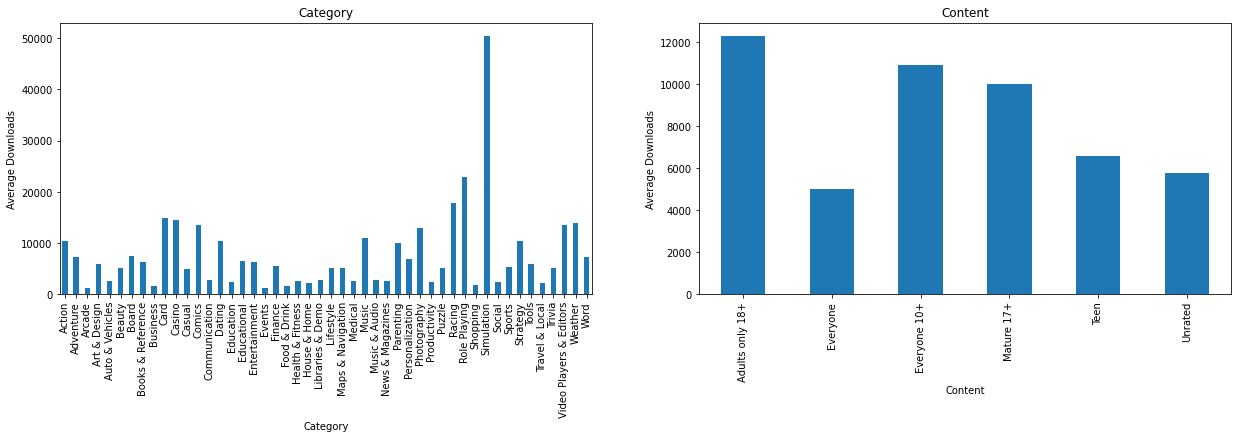

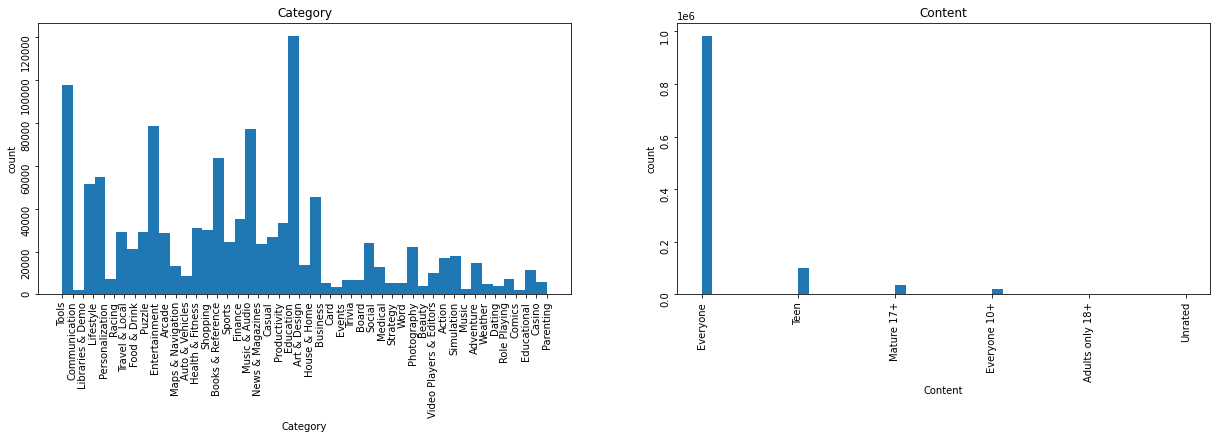

In [20]:
fig = plt.figure(figsize=(21,5))
for feature,i in zip(categorical_features, range(1,7)):
    ax = fig.add_subplot(1,2,i)
    dataset = data.copy()
    dataset.groupby(feature)['Average_Downloads'].median().plot.bar() #Plot against average downloads (median) with categorical features
    ax.set_xlabel(feature)
    ax.set_ylabel("Average Downloads")
    ax.set_title(feature)
    
fig = plt.figure(figsize=(21,5))
for feature,i in zip(categorical_features, range(1,3)):
    ax = fig.add_subplot(1,2,i)
    dataset = data.copy()
    dataset[feature].hist(bins=45,rwidth = 1)
    ax.set_xlabel(feature)
    ax.set_ylabel("count")
    ax.grid(False)
    ax.tick_params(rotation =90)
    ax.set_title(feature)

plt.show()

Considering the first two plots 
- The category **Simulation** is having abnormally high **average downloads**, but its count is considerably low as per the below histograms
- the Content on **Everyone** is having low Average downloads but the count is unexpectedly high

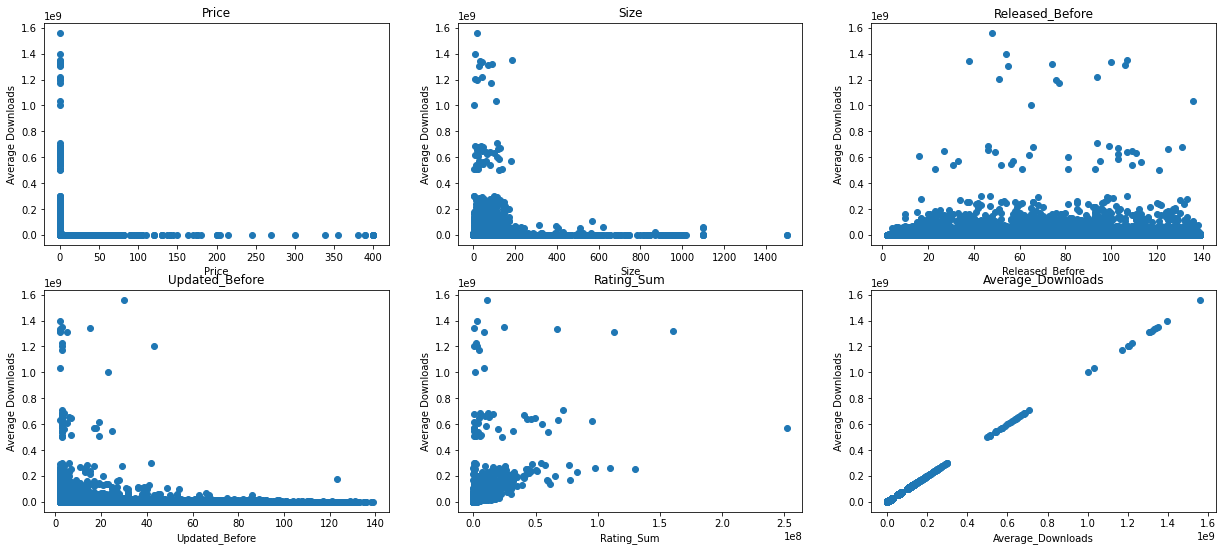

In [21]:
fig = plt.figure(figsize=(21,9))
for feature,i in zip(continuous_feature, range(1,7)):
    ax = fig.add_subplot(2,3,i)
    ax.scatter(data[feature],data['Average_Downloads'])
    ax.set_xlabel(feature)
    ax.set_ylabel("Average Downloads")
    ax.set_title(feature)

plt.show()

As we discussed above every column with respect to Average Downloads is clustered around zero of Average Downloads
   - but exceptionally Average Downloads with respect to Rating_sum **both** are clustered at zero which means there is lots of outliers in Rating Sum also like Average Downloads 

### Plotting Distribution graphs for **original Data** vs **logarithm Transformed Data**

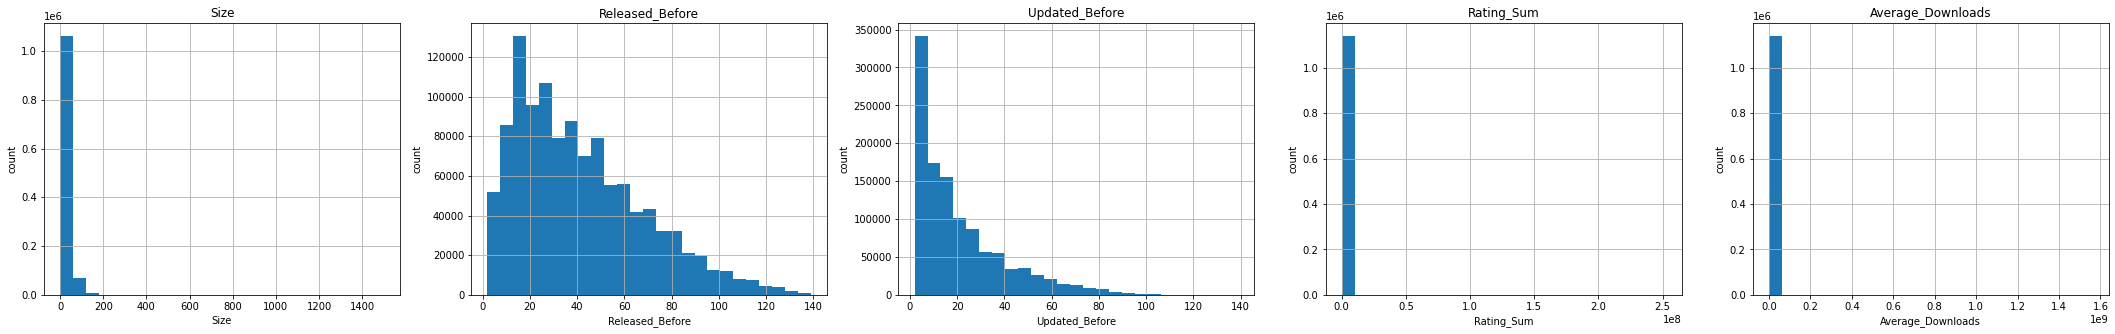

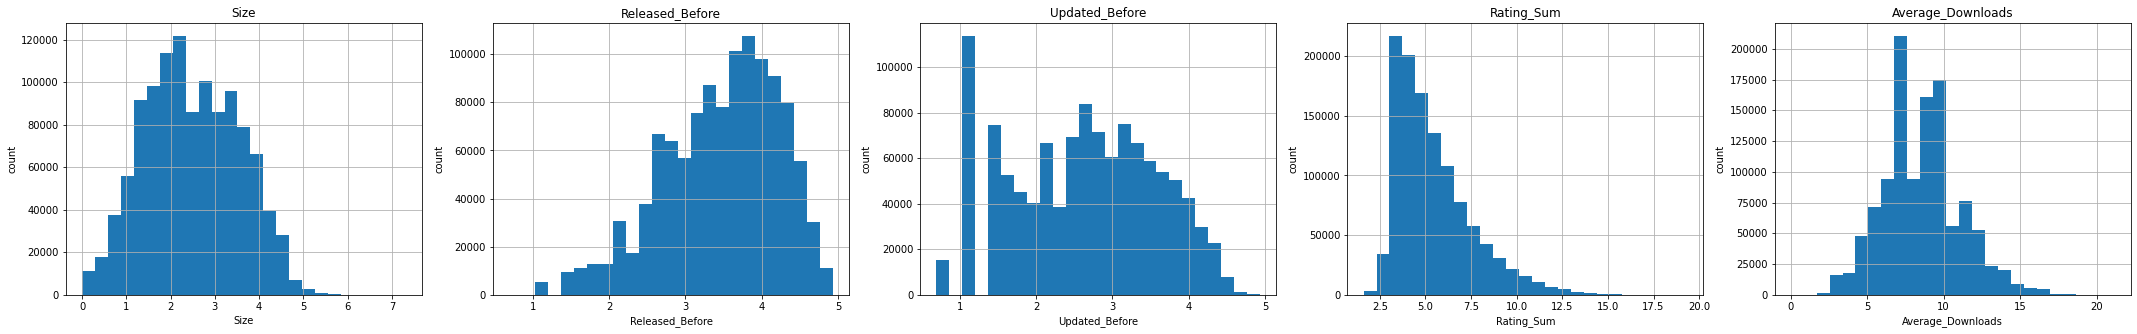

In [22]:
fig = plt.figure(figsize=(37,5))

for feature,i in zip(['Size', 'Released_Before', 'Updated_Before', 'Rating_Sum', 'Average_Downloads'], range(1,7)):
    ax = fig.add_subplot(1,5,i)
    dataset = data.copy()
    dataset[feature].hist(bins=25)
    ax.set_xlabel(feature)
    ax.set_ylabel("count")
    ax.set_title(feature)

plt.show()
fig = plt.figure(figsize=(37,5))

for feature,i in zip(['Size', 'Released_Before', 'Updated_Before', 'Rating_Sum', 'Average_Downloads'], range(1,7)):
    ax = fig.add_subplot(1,5,i)
    dataset = data.copy()
    dataset[feature]=np.log(dataset[feature])
    dataset[feature].hist(bins=25)
    ax.set_xlabel(feature)
    ax.set_ylabel("count")
    ax.set_title(feature)

plt.show()

- The first row of plots mean the distribution of columns *without log* transformtion
    - Almost every plot is left skewed and spesifically **Size, Rating_Sum and Average_Downloads** are completly left
        - which again indicates the possibility of outliers
- The second row of plots mean the distribution of columns *with log* transformtion
    - now it gives a good looking plot compare to before, but still they are not perfect **normal distribution**

## Box plot to detect outliers

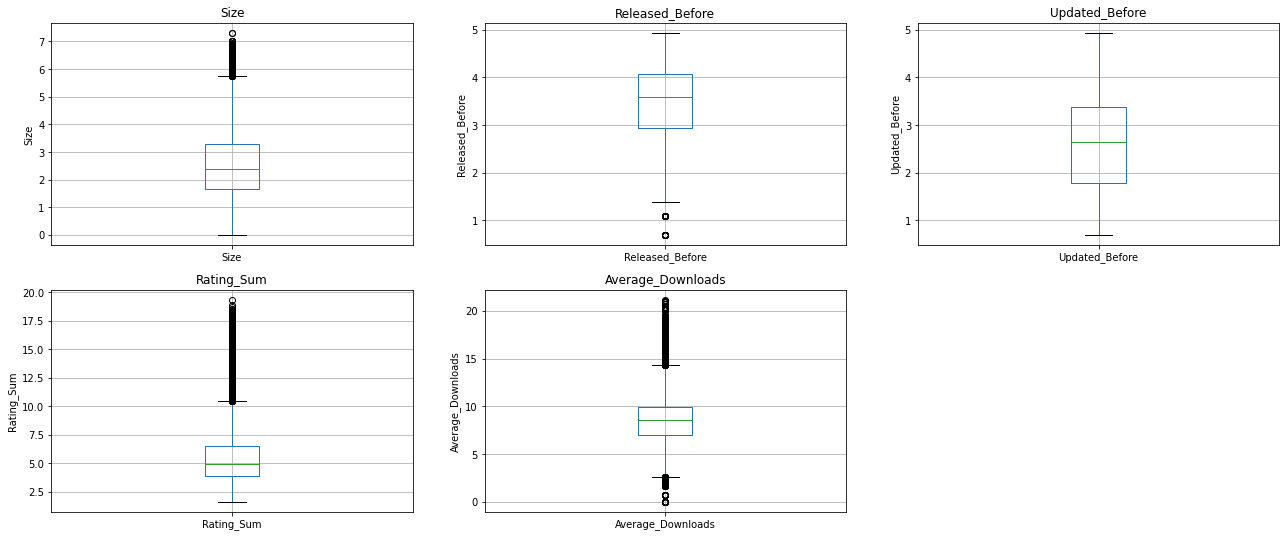

In [23]:
#np.warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(22,9))

for feature,i in zip(['Size', 'Released_Before', 'Updated_Before', 'Rating_Sum', 'Average_Downloads'], range(1,7)):
    ax = fig.add_subplot(2,3,i)
    dataset = data.copy()
    dataset[feature]=np.log(dataset[feature])
    dataset.boxplot(column=feature)
    ax.set_ylabel(feature)
    ax.set_title(feature)
    
plt.show()

Plotting every continuous featured columns:- 
- It is clear that **Size, Rating_Sum and Average_Downloads** have lot of outliers
- Released_Before column too have a little of them

In [24]:
def Outlier(dataset,feature):
    shape1 = dataset.shape[0]                                 #taking the shape before removing outliers to keep track of no of outliers
    dataset[feature]=np.log(dataset[feature])                 #Applying log transformation
    lst = sorted(dataset[feature])                            #taking a list of sorted values of that column
    
    quantile1, quantile3 = np.percentile(lst,[25,75])         #obtaining 25th and 75th percentile
    iqr_value = quantile3 - quantile1                         #finding inter-quartile value(difference)
    
    #obtaining lower bound and upper bound
    lower_bound_val = quantile1 - (1.5 * iqr_value)
    upper_bound_val = quantile3 + (1.5 * iqr_value)
    
    dataset.drop(dataset[(dataset[feature] <= lower_bound_val)].index,0,inplace=True) #Dropping the rows having values below lower bound value
    dataset.drop(dataset[(dataset[feature] >= upper_bound_val)].index,0,inplace=True) #Dropping the rows having values above upper bound value
    
    return shape1-(dataset.shape[0])

Executing the function by keeping track of shape and no of outliers in each column

In [29]:
data1 = data.copy()
print(data.shape)
for feature in ['Size', 'Released_Before', 'Updated_Before', 'Rating_Sum', 'Average_Downloads']:
    shape1 = Outlier(data1,feature)
    print('\n {} has {} outliers'.format(feature, shape1))
data1.shape

(1140541, 12)

 Size has 256 outliers

 Released_Before has 5220 outliers

 Updated_Before has 0 outliers

 Rating_Sum has 35025 outliers

 Average_Downloads has 13149 outliers


(1086891, 12)

It has removed all the outliers
- the wieghts are similar to what we saw in the box plot above

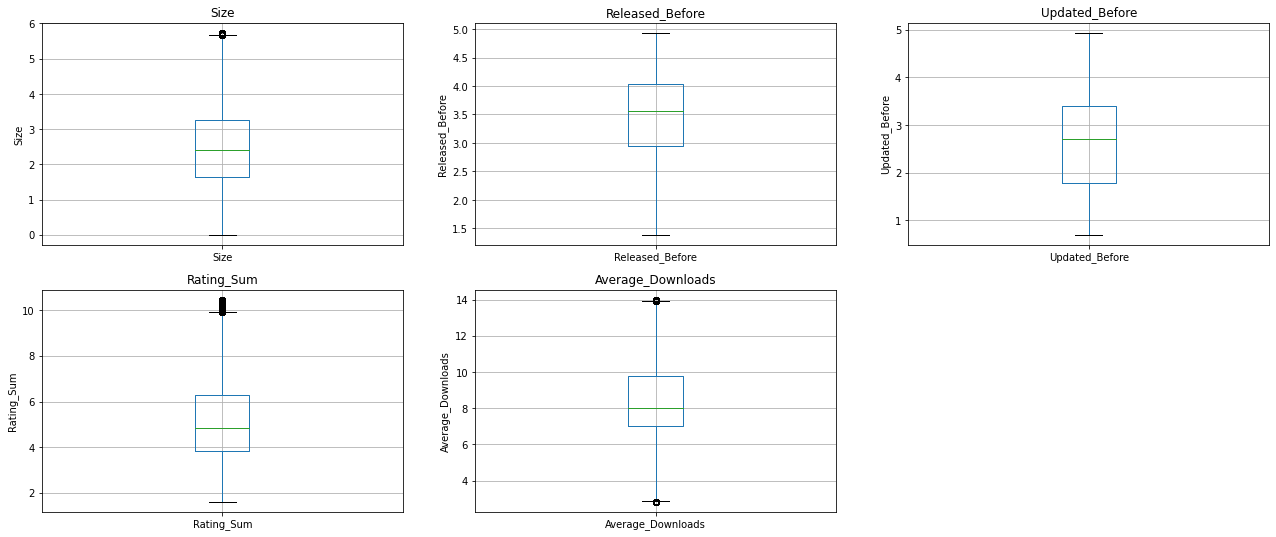

In [26]:
#np.warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(22,9))

for feature,i in zip(['Size', 'Released_Before', 'Updated_Before', 'Rating_Sum', 'Average_Downloads'], range(1,7)):
    ax = fig.add_subplot(2,3,i)
    data1.boxplot(column=feature)
    ax.set_ylabel(feature)
    ax.set_title(feature)
    
plt.show()

Now the box plot seem clear and tidy without outliers, but still there are some outliers which we will deal later

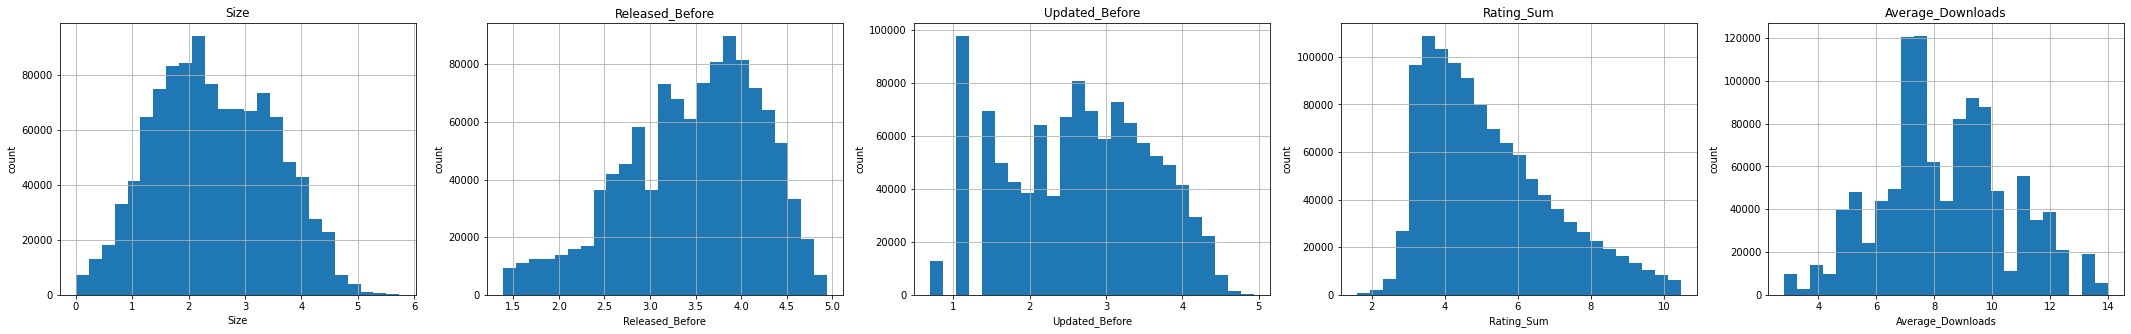

In [27]:
fig = plt.figure(figsize=(37,5))

for feature,i in zip(['Size', 'Released_Before', 'Updated_Before', 'Rating_Sum', 'Average_Downloads'], range(1,7)):
    ax = fig.add_subplot(1,5,i)
    data1[feature].hist(bins=25)
    ax.set_xlabel(feature)
    ax.set_ylabel("count")
    ax.set_title(feature)

plt.show()

Now this distribution diagram is a kind of complete one because, it has undergone **log transformation** and also **outlier elimination**
- Almost everything is as expected(Normal distribution)

f:\nordic internship\projects\dsbjun21\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


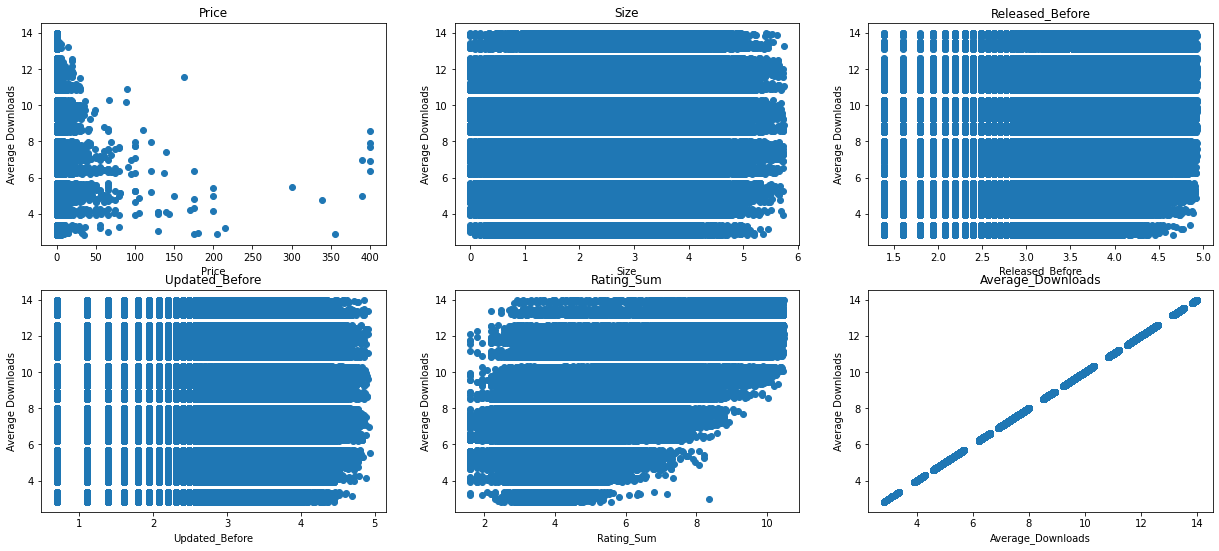

In [28]:
fig = plt.figure(figsize=(21,9))

for feature,i in zip(continuous_feature, range(1,7)):
    ax = fig.add_subplot(2,3,i)
    ax.scatter(data1[feature],data1['Average_Downloads'])
    data1[feature]=np.log(data1[feature])
    ax.set_xlabel(feature)
    ax.set_ylabel("Average Downloads")
    ax.set_title(feature)

plt.show()